In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IN_PATH = "/shared/3/projects/newsDiffusion/data/interim/NEREmbedding/embeddingClusterList2020.pkl"

In [ ]:
clustDf = pd.read_pickle(IN_PATH)

In [ ]:
clustDf.head()

In [14]:
#load in main data source 
#we don't want to use "content", because it takes up a lot of space and
#we have already embedded the content. Can always merge back in later so long as we 
#keep the "key" column
LOAD_COLS = list(pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/newsData/fullDataWithNER.tsv", \
                     nrows = 1, sep="\t").columns)
LOAD_COLS.remove("content")
LOAD_COLS.remove("NamedEntities")

df = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/newsData/fullDataWithNER.tsv",\
                 sep="\t", usecols=LOAD_COLS)

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (2,3,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year

#filter so we only use 2020 where we have Reuters 
df = df[df["year"] == 2020]

In [27]:
#only keep rows for which we have a cluster number associated with the key 
df = pd.merge(df, clustDf, on="key", how="right")

In [28]:
#should be the same as length of clustDf or we have a merging issue
#luckily, no issue here 
df.shape

(1266095, 45)

In [29]:
#another sanity check, there should be no
#duplicates since we created connected components of our graph 
len(df["key"].drop_duplicates())

1266095

In [61]:
#get a solid resolution for displaying graphs 
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

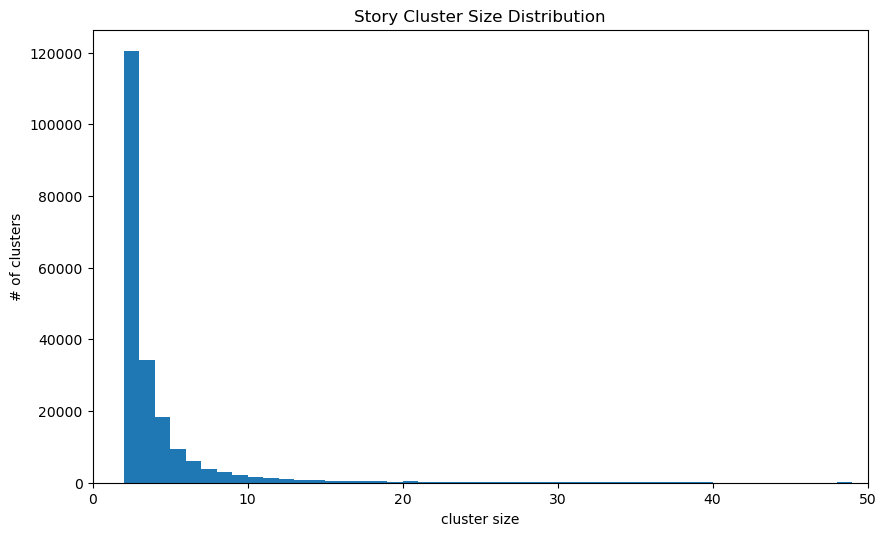

In [160]:
#some representation of how many clusters of different sizes we have
#asks the question (how much of the news ecosystem is large stories)
clustSizesDf = df[["key", "clustNum"]].groupby(by="clustNum").agg(len)

CLUST_SIZE_CUTOFF = 50
clustSizes = clustSizesDf["key"]
clustSizes = [item for item in clustSizes if item <= CLUST_SIZE_CUTOFF]
plt.hist(clustSizes, bins=np.arange(0, CLUST_SIZE_CUTOFF, 1))
plt.xlim(0, CLUST_SIZE_CUTOFF)
plt.title("Story Cluster Size Distribution")
plt.xlabel("cluster size")
plt.ylabel("# of clusters")
plt.show()

In [186]:
len(clustSizesDf)
deciles = np.percentile(clustSizesDf["key"], [10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99])
print(deciles)
print(np.mean(clustSizesDf["key"]))
print(np.median(clustSizesDf["key"]))

print(max(clustSizesDf["key"]))
print(min(clustSizesDf["key"]))

array([ 2.,  2.,  2.,  2.,  2.,  3.,  3.,  4.,  7., 11., 34.])

In [189]:
sorted(clustSizesDf["key"], reverse=True)

[263398,
 21524,
 8556,
 2816,
 2673,
 2648,
 2030,
 1938,
 1860,
 1699,
 1668,
 1653,
 1622,
 1578,
 1520,
 1515,
 1487,
 1449,
 1426,
 1353,
 1320,
 1312,
 1253,
 1248,
 1236,
 1084,
 1023,
 1017,
 974,
 964,
 930,
 893,
 874,
 836,
 825,
 816,
 803,
 782,
 777,
 776,
 743,
 727,
 696,
 686,
 679,
 654,
 635,
 618,
 609,
 590,
 589,
 579,
 579,
 573,
 572,
 571,
 571,
 562,
 559,
 536,
 535,
 529,
 509,
 500,
 499,
 490,
 487,
 486,
 479,
 465,
 462,
 448,
 441,
 436,
 434,
 427,
 423,
 420,
 420,
 410,
 409,
 404,
 401,
 396,
 396,
 393,
 389,
 387,
 382,
 376,
 376,
 375,
 370,
 369,
 368,
 367,
 365,
 364,
 358,
 356,
 351,
 349,
 346,
 345,
 342,
 341,
 339,
 339,
 336,
 332,
 331,
 326,
 324,
 322,
 321,
 319,
 319,
 318,
 317,
 314,
 313,
 310,
 309,
 309,
 307,
 306,
 302,
 301,
 301,
 301,
 300,
 300,
 296,
 296,
 295,
 293,
 290,
 289,
 287,
 286,
 285,
 285,
 283,
 283,
 283,
 282,
 281,
 280,
 279,
 274,
 273,
 271,
 270,
 269,
 267,
 265,
 265,
 263,
 262,
 258,
 258,
 25

In [98]:
#some sanity check relating to dates
#we expect the average cluster to have a low variance 
#leverage the fact that datetime objects are just ints 
dateDf = df[["date", "clustNum"]]
dateDf["date"] = dateDf['date'].astype(int)

<ipython-input-98-eba27bf28103>:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dateDf["date"] = dateDf['date'].astype(int)
<ipython-input-98-eba27bf28103>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateDf["date"] = dateDf['date'].astype(int)


In [146]:
#get cluster min and max days 
groupedDates = dateDf.groupby("clustNum").agg([np.max, np.min])
groupedDates.columns = ['_'.join(c) for c in groupedDates.columns.values]

#get the # of days a cluster lasts 
dayRanges = groupedDates["date_amax"] - groupedDates["date_amin"]
dayRanges = pd.to_timedelta(dayRange)

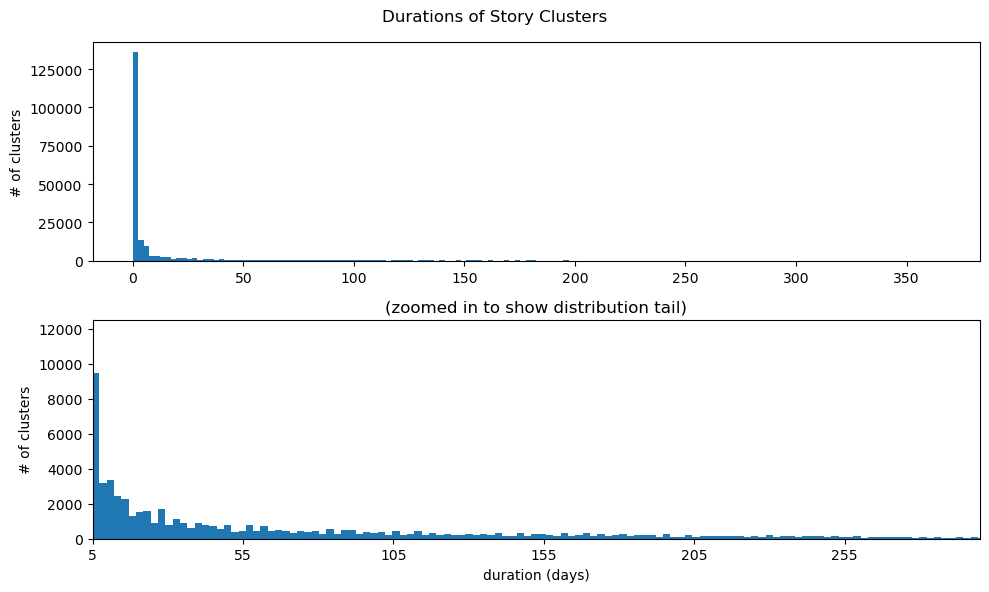

In [158]:
fig, ax = plt.subplots(2)
ax[0].hist(dayRanges.dt.days, bins=150)
#ax[0].set_xlim([-1, 200])
ax[0].set_ylabel("# of clusters")

ax[1].hist(dayRanges.dt.days, bins=150)
ax[1].set_xlim([5, 300])
ax[1].set_ylim([0, 12500])
ax[1].set_xticks(np.arange(5, 300,50))
ax[1].set_title("(zoomed in to show distribution tail)")
ax[1].set_ylabel("# of clusters")
ax[1].set_xlabel("duration (days)")

fig.suptitle("Durations of Story Clusters")
fig.tight_layout()

In [99]:
groupedDates = dateDf.groupby("clustNum").agg([np.mean, np.std, np.var])
groupedDates.columns = ['_'.join(c) for c in groupedDates.columns.values]

In [100]:
groupedDates

,date_mean,date_std,date_var
clustNum,,,
0,1.586264e+18,8.975870e+15,8.056624e+31
1,1.597925e+18,3.397075e+15,1.154012e+31
2,1.584507e+18,3.863925e+13,1.492992e+27
3,1.582222e+18,4.320000e+13,1.866240e+27
4,1.589458e+18,6.109403e+13,3.732480e+27
...,...,...,...
209409,1.599048e+18,6.109403e+13,3.732480e+27
209410,1.587082e+18,1.221881e+14,1.492992e+28
209411,1.584922e+18,0.000000e+00,0.000000e+00


## TODO: 
figure out why variance is causing an issue here... seems suspicious 

In [101]:
groupedDates['date_mean'] = pd.to_datetime(groupedDates['date_mean'])
groupedDates['date_std'] = pd.to_timedelta(groupedDates['date_std'])
groupedDates['date_var'] = pd.to_timedelta(groupedDates['date_var'])

In [102]:
groupedDates

,date_mean,date_std,date_var
clustNum,,,
0,2020-04-07 12:47:41.612130816,103 days 21:17:49.647268845,0 days
1,2020-08-20 11:59:05.247148288,39 days 07:37:55.282783509,0 days
2,2020-03-18 04:48:00.000000000,0 days 10:43:59.254651196,0 days
3,2020-02-20 18:00:00.000000000,0 days 12:00:00,0 days
4,2020-05-14 12:00:00.000000000,0 days 16:58:14.025894517,0 days
...,...,...,...
209409,2020-09-02 12:00:00.000000000,0 days 16:58:14.025894517,0 days
209410,2020-04-17 00:00:00.000000000,1 days 09:56:28.051789035,0 days
209411,2020-03-23 00:00:00.000000000,0 days 00:00:00,0 days


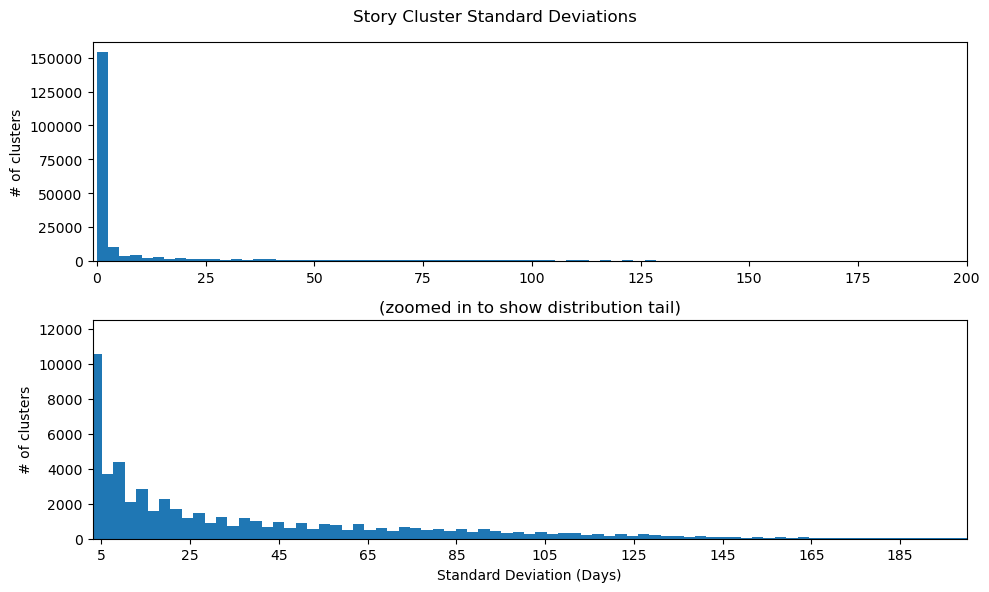

In [138]:
fig, ax = plt.subplots(2)
ax[0].hist(groupedDates["date_std"].dt.days, bins=100)
ax[0].set_xlim([-1, 200])
ax[0].set_ylabel("# of clusters")

ax[1].hist(groupedDates["date_std"].dt.days, bins=100)
ax[1].set_xlim([3, 200])
ax[1].set_ylim([0, 12500])
ax[1].set_xticks(np.arange(5, 200,20))
ax[1].set_title("(zoomed in to show distribution tail)")
ax[1].set_ylabel("# of clusters")
ax[1].set_xlabel("Standard Deviation (Days)")

fig.suptitle("Story Cluster Standard Deviations")
fig.tight_layout()